In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
averageNumberOfArrivalsPerUnitTime1 = 0.3
averageNumberOfArrivalsPerUnitTime2 = 0.1
averageNumberOfArrivalsPerUnitTime3 = 0.2

In [3]:
# strategy 1: the server randomly serves one of the three queues during each interval

# simulate 10,000,001 times, with q1(0) = q2(0) = q3(0) = 0
# discard first 2,000,000 samples to ensure steady state
# take samples every 100 times to ensure independence

q1 = np.zeros(10000002)
q1_output = np.zeros(80001)
q2 = np.zeros(10000002)
q2_output = np.zeros(80001)
q3 = np.zeros(10000002)
q3_output = np.zeros(80001)

for t in range(1, 10000002):
    a1 = np.random.poisson(averageNumberOfArrivalsPerUnitTime1)
    #a1 = np.random.binomial(n = 10, p = averageNumberOfArrivalsPerUnitTime1 / 10)
    #a1 = np.random.hypergeometric(4, 96, 5)
    a2 = np.random.poisson(averageNumberOfArrivalsPerUnitTime2)
    a3 = np.random.poisson(averageNumberOfArrivalsPerUnitTime3)
    s = np.array([1, 0, 0])
    random.shuffle(s)
    q1[t] = max(q1[t - 1] + a1 - s[0], 0)
    q2[t] = max(q2[t - 1] + a2 - s[1], 0)
    q3[t] = max(q3[t - 1] + a3 - s[2], 0)

for t in range(0, 80001):
    q1_output[t] = q1[2 * 1000000 + 1 + 100 * t]
    q2_output[t] = q2[2 * 1000000 + 1 + 100 * t]
    q3_output[t] = q3[2 * 1000000 + 1 + 100 * t]

Policy = Random
Average Arrival Rate for Queue 1 = λ₁ = 0.3
Average Arrival Rate for Queue 2 = λ₂ = 0.1
Average Arrival Rate for Queue 3 = λ₃ = 0.2
Service Rate μ = 1 (for all 3 queues)

Steady-state Average Size of Queue 1 ≈ 7.275
Steady-state Average Size of Queue 2 ≈ 0.307
Steady-state Average Size of Queue 3 ≈ 1.144
Steady-state Average Total Queue Size ≈ 8.726


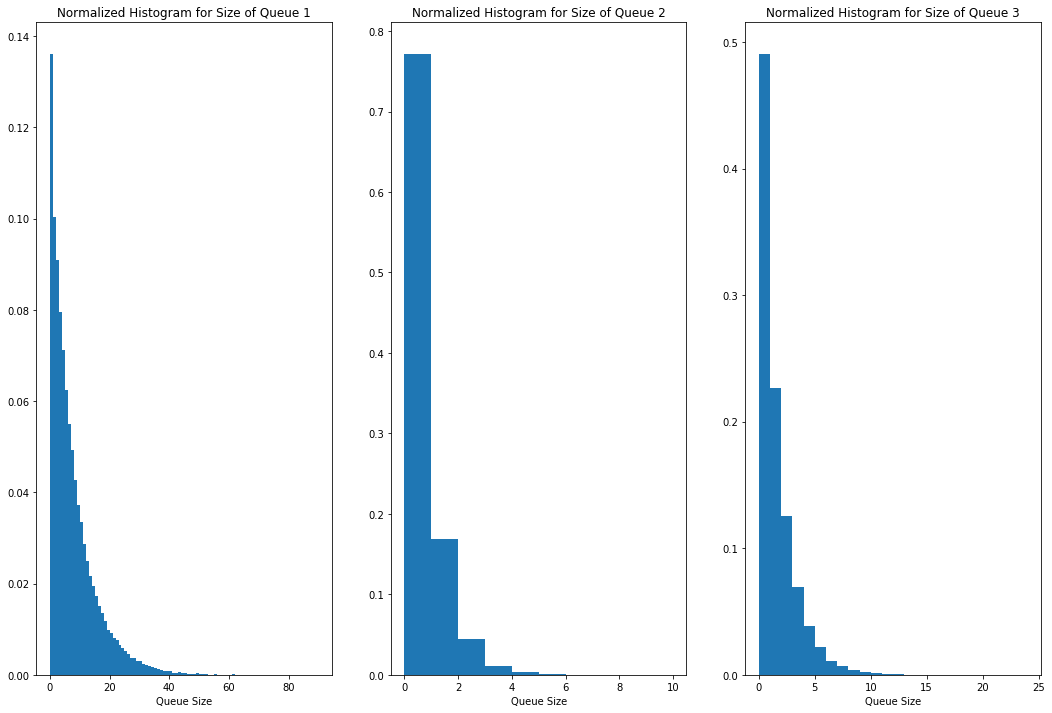

In [4]:
# output for strategy 1

print('Policy = Random')
print('Average Arrival Rate for Queue 1 = \u03BB\u2081 =', averageNumberOfArrivalsPerUnitTime1)
print('Average Arrival Rate for Queue 2 = \u03BB\u2082 =', averageNumberOfArrivalsPerUnitTime2)
print('Average Arrival Rate for Queue 3 = \u03BB\u2083 =', averageNumberOfArrivalsPerUnitTime3)
print('Service Rate \u03BC = 1 (for all 3 queues)')
print('\nSteady-state Average Size of Queue 1 \u2248', round(np.average(q1_output), 3))
print('Steady-state Average Size of Queue 2 \u2248', round(np.average(q2_output), 3))
print('Steady-state Average Size of Queue 3 \u2248', round(np.average(q3_output), 3))
print('Steady-state Average Total Queue Size \u2248', round(np.average(q1_output + q2_output + q3_output), 3))

plt.figure(figsize = (18, 12))

plt.subplot(1, 3, 1)

plt.hist(q1_output, bins = np.linspace(0, int(max(q1_output)) + 1, int(max(q1_output) + 2)), density = True)
plt.xlabel('Queue Size')
plt.title('Normalized Histogram for Size of Queue 1')


plt.subplot(1, 3, 2)

plt.hist(q2_output, bins = np.linspace(0, int(max(q2_output)) + 1, int(max(q2_output) + 2)), density = True)
plt.xlabel('Queue Size')
plt.title('Normalized Histogram for Size of Queue 2')


plt.subplot(1, 3, 3)

plt.hist(q3_output, bins = np.linspace(0, int(max(q3_output)) + 1, int(max(q3_output) + 2)), density = True)
plt.xlabel('Queue Size')
plt.title('Normalized Histogram for Size of Queue 3')

plt.show()

In [5]:
# strategy 2: the server serves the shortest queue during each interval

def chooseShortestQueueToServe(s, q):
    q_nonzero = np.array([])
    for e in q:
        if e > 0:
            q_nonzero = np.append(q_nonzero, e)
    if len(q_nonzero) == 0:
        s[0] = 1
        return
    for i in range(len(q)):
        if q[i] == min(q_nonzero):
            s[i] = 1
            return

# simulate 10,000,001 times, with q1(0) = q2(0) = q3(0) = 0
# discard first 2,000,000 samples to ensure steady state
# take samples every 100 times to ensure independence

q1 = np.zeros(10000002)
q1_output = np.zeros(80001)
q2 = np.zeros(10000002)
q2_output = np.zeros(80001)
q3 = np.zeros(10000002)
q3_output = np.zeros(80001)

for t in range(1, 10000002):
    a1 = np.random.poisson(averageNumberOfArrivalsPerUnitTime1)
    #a1 = np.random.binomial(n = 10, p = averageNumberOfArrivalsPerUnitTime1 / 10)
    #a1 = np.random.hypergeometric(4, 96, 5)
    a2 = np.random.poisson(averageNumberOfArrivalsPerUnitTime2)
    a3 = np.random.poisson(averageNumberOfArrivalsPerUnitTime3)
    s = np.zeros(3)
    chooseShortestQueueToServe(s, np.array([q1[t - 1], q2[t - 1], q3[t - 1]]))
    q1[t] = max(q1[t - 1] + a1 - s[0], 0)
    q2[t] = max(q2[t - 1] + a2 - s[1], 0)
    q3[t] = max(q3[t - 1] + a3 - s[2], 0)

for t in range(0, 80001):
    q1_output[t] = q1[2 * 1000000 + 1 + 100 * t]
    q2_output[t] = q2[2 * 1000000 + 1 + 100 * t]
    q3_output[t] = q3[2 * 1000000 + 1 + 100 * t]

Policy = Serve-the-shortest-nonzero-queue
Average Arrival Rate for Queue 1 = λ₁ = 0.3
Average Arrival Rate for Queue 2 = λ₂ = 0.1
Average Arrival Rate for Queue 3 = λ₃ = 0.2
Service Rate μ = 1 (for all 3 queues)

Steady-state Average Size of Queue 1 ≈ 0.254
Steady-state Average Size of Queue 2 ≈ 0.136
Steady-state Average Size of Queue 3 ≈ 0.363
Steady-state Average Total Queue Size ≈ 0.753


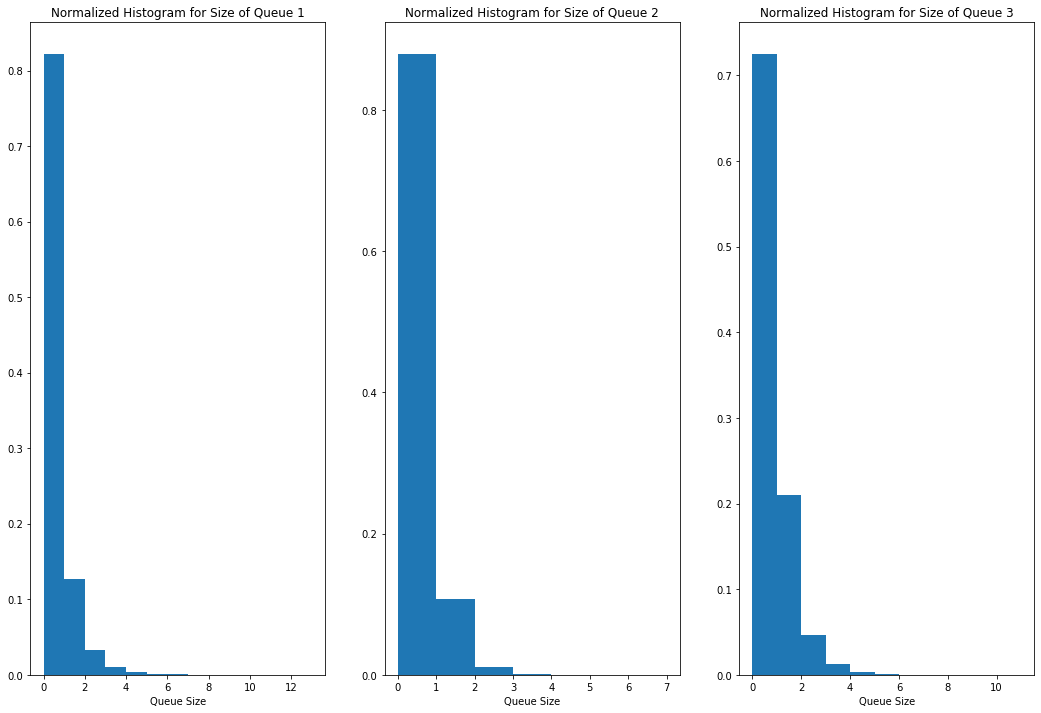

In [6]:
# output for strategy 2

print('Policy = Serve-the-shortest-nonzero-queue')
print('Average Arrival Rate for Queue 1 = \u03BB\u2081 =', averageNumberOfArrivalsPerUnitTime1)
print('Average Arrival Rate for Queue 2 = \u03BB\u2082 =', averageNumberOfArrivalsPerUnitTime2)
print('Average Arrival Rate for Queue 3 = \u03BB\u2083 =', averageNumberOfArrivalsPerUnitTime3)
print('Service Rate \u03BC = 1 (for all 3 queues)')
print('\nSteady-state Average Size of Queue 1 \u2248', round(np.average(q1_output), 3))
print('Steady-state Average Size of Queue 2 \u2248', round(np.average(q2_output), 3))
print('Steady-state Average Size of Queue 3 \u2248', round(np.average(q3_output), 3))
print('Steady-state Average Total Queue Size \u2248', round(np.average(q1_output + q2_output + q3_output), 3))

plt.figure(figsize = (18, 12))

plt.subplot(1, 3, 1)

plt.hist(q1_output, bins = np.linspace(0, int(max(q1_output)) + 1, int(max(q1_output) + 2)), density = True)
plt.xlabel('Queue Size')
plt.title('Normalized Histogram for Size of Queue 1')


plt.subplot(1, 3, 2)

plt.hist(q2_output, bins = np.linspace(0, int(max(q2_output)) + 1, int(max(q2_output) + 2)), density = True)
plt.xlabel('Queue Size')
plt.title('Normalized Histogram for Size of Queue 2')


plt.subplot(1, 3, 3)

plt.hist(q3_output, bins = np.linspace(0, int(max(q3_output)) + 1, int(max(q3_output) + 2)), density = True)
plt.xlabel('Queue Size')
plt.title('Normalized Histogram for Size of Queue 3')

plt.show()

In [7]:
# strategy 3: the server serves the longest queue during each interval

def chooseLongestQueueToServe(s, q):
    for i in range(len(q)):
        if q[i] == max(q):
            s[i] = 1
            return

# simulate 10,000,001 times, with q1(0) = q2(0) = q3(0) = 0
# discard first 2,000,000 samples to ensure steady state
# take samples every 100 times to ensure independence

q1 = np.zeros(10000002)
q1_output = np.zeros(80001)
q2 = np.zeros(10000002)
q2_output = np.zeros(80001)
q3 = np.zeros(10000002)
q3_output = np.zeros(80001)

for t in range(1, 10000002):
    a1 = np.random.poisson(averageNumberOfArrivalsPerUnitTime1)
    #a1 = np.random.binomial(n = 10, p = averageNumberOfArrivalsPerUnitTime1 / 10)
    #a1 = np.random.hypergeometric(4, 96, 5)
    a2 = np.random.poisson(averageNumberOfArrivalsPerUnitTime2)
    a3 = np.random.poisson(averageNumberOfArrivalsPerUnitTime3)
    s = np.zeros(3)
    chooseLongestQueueToServe(s, np.array([q1[t - 1], q2[t - 1], q3[t - 1]]))
    q1[t] = max(q1[t - 1] + a1 - s[0], 0)
    q2[t] = max(q2[t - 1] + a2 - s[1], 0)
    q3[t] = max(q3[t - 1] + a3 - s[2], 0)

for t in range(0, 80001):
    q1_output[t] = q1[2 * 1000000 + 1 + 100 * t]
    q2_output[t] = q2[2 * 1000000 + 1 + 100 * t]
    q3_output[t] = q3[2 * 1000000 + 1 + 100 * t]

Policy = Serve-the-longest-queue
Average Arrival Rate for Queue 1 = λ₁ = 0.3
Average Arrival Rate for Queue 2 = λ₂ = 0.1
Average Arrival Rate for Queue 3 = λ₃ = 0.2
Service Rate μ = 1 (for all 3 queues)

Steady-state Average Size of Queue 1 ≈ 0.225
Steady-state Average Size of Queue 2 ≈ 0.162
Steady-state Average Size of Queue 3 ≈ 0.361
Steady-state Average Total Queue Size ≈ 0.748


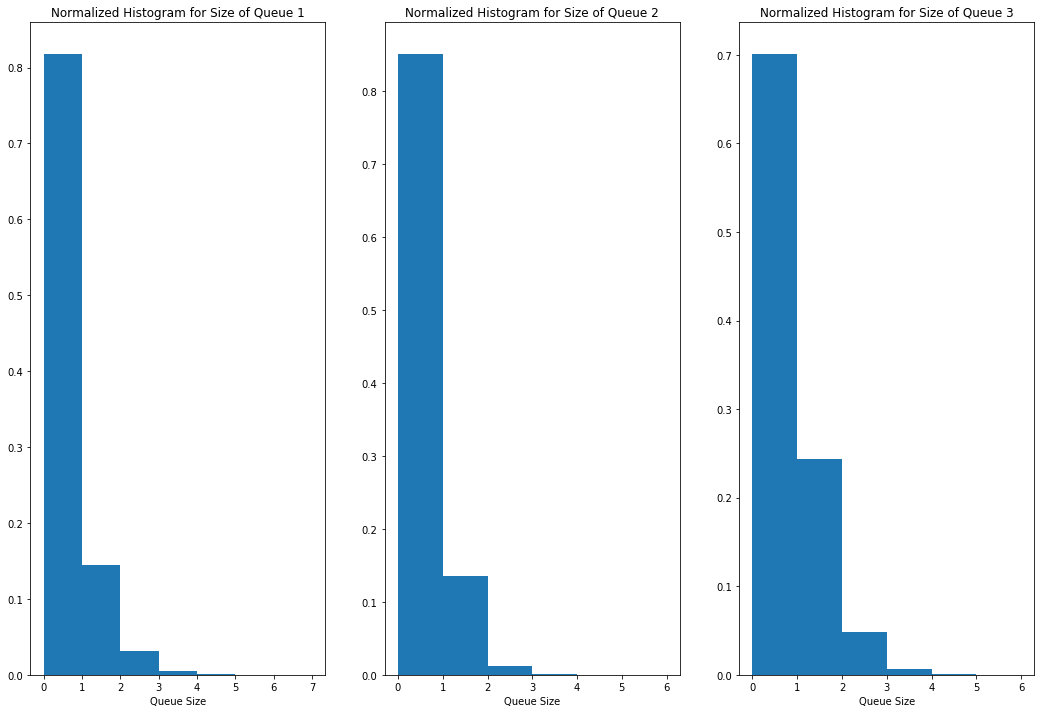

In [8]:
# output for strategy 3

print('Policy = Serve-the-longest-queue')
print('Average Arrival Rate for Queue 1 = \u03BB\u2081 =', averageNumberOfArrivalsPerUnitTime1)
print('Average Arrival Rate for Queue 2 = \u03BB\u2082 =', averageNumberOfArrivalsPerUnitTime2)
print('Average Arrival Rate for Queue 3 = \u03BB\u2083 =', averageNumberOfArrivalsPerUnitTime3)
print('Service Rate \u03BC = 1 (for all 3 queues)')
print('\nSteady-state Average Size of Queue 1 \u2248', round(np.average(q1_output), 3))
print('Steady-state Average Size of Queue 2 \u2248', round(np.average(q2_output), 3))
print('Steady-state Average Size of Queue 3 \u2248', round(np.average(q3_output), 3))
print('Steady-state Average Total Queue Size \u2248', round(np.average(q1_output + q2_output + q3_output), 3))

plt.figure(figsize = (18, 12))

plt.subplot(1, 3, 1)

plt.hist(q1_output, bins = np.linspace(0, int(max(q1_output)) + 1, int(max(q1_output) + 2)), density = True)
plt.xlabel('Queue Size')
plt.title('Normalized Histogram for Size of Queue 1')


plt.subplot(1, 3, 2)

plt.hist(q2_output, bins = np.linspace(0, int(max(q2_output)) + 1, int(max(q2_output) + 2)), density = True)
plt.xlabel('Queue Size')
plt.title('Normalized Histogram for Size of Queue 2')


plt.subplot(1, 3, 3)

plt.hist(q3_output, bins = np.linspace(0, int(max(q3_output)) + 1, int(max(q3_output) + 2)), density = True)
plt.xlabel('Queue Size')
plt.title('Normalized Histogram for Size of Queue 3')

plt.show()

In [9]:
averageNumberOfArrivalsPerUnitTime1 = 0.05
averageNumberOfArrivalsPerUnitTime2 = 0.61
averageNumberOfArrivalsPerUnitTime3 = 0.33

# strategy 3: the server serves the longest queue during each interval

def chooseLongestQueueToServe(s, q):
    for i in range(len(q)):
        if q[i] == max(q):
            s[i] = 1
            return

# simulate 10,000,001 times, with q1(0) = q2(0) = q3(0) = 0
# discard first 2,000,000 samples to ensure steady state
# take samples every 100 times to ensure independence

q1 = np.zeros(10000002)
q1_output = np.zeros(80001)
q2 = np.zeros(10000002)
q2_output = np.zeros(80001)
q3 = np.zeros(10000002)
q3_output = np.zeros(80001)

for t in range(1, 10000002):
    a1 = np.random.poisson(averageNumberOfArrivalsPerUnitTime1)
    #a1 = np.random.binomial(n = 10, p = averageNumberOfArrivalsPerUnitTime1 / 10)
    #a1 = np.random.hypergeometric(4, 96, 5)
    a2 = np.random.poisson(averageNumberOfArrivalsPerUnitTime2)
    a3 = np.random.poisson(averageNumberOfArrivalsPerUnitTime3)
    s = np.zeros(3)
    chooseLongestQueueToServe(s, np.array([q1[t - 1], q2[t - 1], q3[t - 1]]))
    q1[t] = max(q1[t - 1] + a1 - s[0], 0)
    q2[t] = max(q2[t - 1] + a2 - s[1], 0)
    q3[t] = max(q3[t - 1] + a3 - s[2], 0)

for t in range(0, 80001):
    q1_output[t] = q1[2 * 1000000 + 1 + 100 * t]
    q2_output[t] = q2[2 * 1000000 + 1 + 100 * t]
    q3_output[t] = q3[2 * 1000000 + 1 + 100 * t]

Policy = Serve-the-longest-queue
Average Arrival Rate for Queue 1 = λ₁ = 0.05
Average Arrival Rate for Queue 2 = λ₂ = 0.61
Average Arrival Rate for Queue 3 = λ₃ = 0.33
Service Rate μ = 1 (for all 3 queues)

Steady-state Average Size of Queue 1 ≈ 15.635
Steady-state Average Size of Queue 2 ≈ 18.012
Steady-state Average Size of Queue 3 ≈ 17.962
Steady-state Average Total Queue Size ≈ 51.609


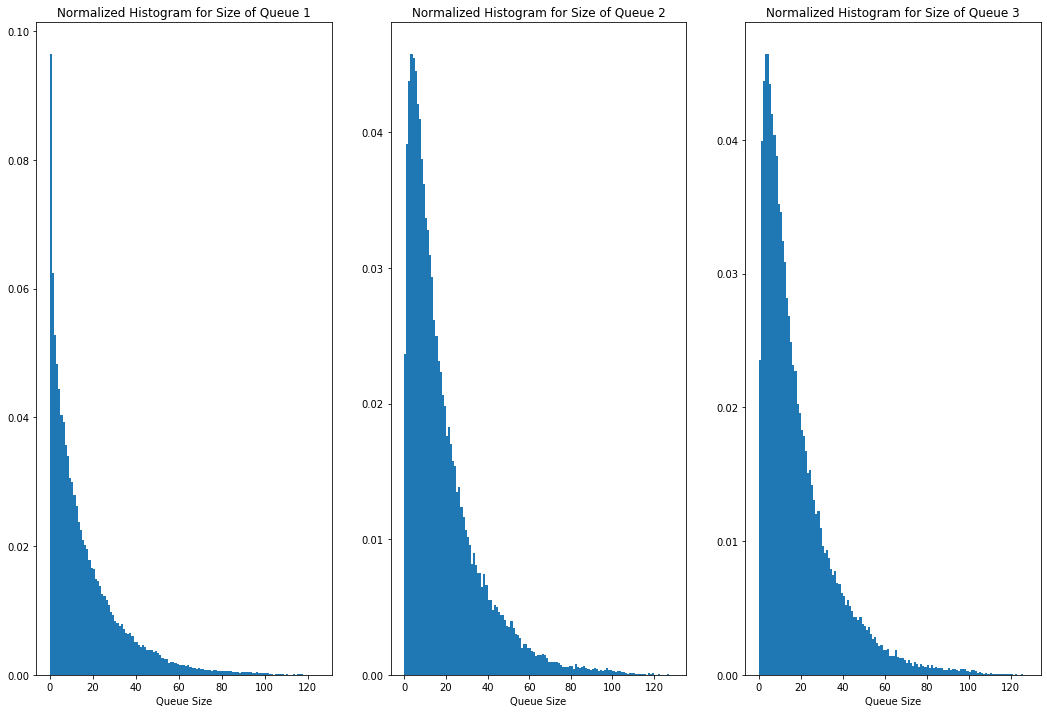

In [10]:
# output for strategy 3

print('Policy = Serve-the-longest-queue')
print('Average Arrival Rate for Queue 1 = \u03BB\u2081 =', averageNumberOfArrivalsPerUnitTime1)
print('Average Arrival Rate for Queue 2 = \u03BB\u2082 =', averageNumberOfArrivalsPerUnitTime2)
print('Average Arrival Rate for Queue 3 = \u03BB\u2083 =', averageNumberOfArrivalsPerUnitTime3)
print('Service Rate \u03BC = 1 (for all 3 queues)')
print('\nSteady-state Average Size of Queue 1 \u2248', round(np.average(q1_output), 3))
print('Steady-state Average Size of Queue 2 \u2248', round(np.average(q2_output), 3))
print('Steady-state Average Size of Queue 3 \u2248', round(np.average(q3_output), 3))
print('Steady-state Average Total Queue Size \u2248', round(np.average(q1_output + q2_output + q3_output), 3))

plt.figure(figsize = (18, 12))

plt.subplot(1, 3, 1)

plt.hist(q1_output, bins = np.linspace(0, int(max(q1_output)) + 1, int(max(q1_output) + 2)), density = True)
plt.xlabel('Queue Size')
plt.title('Normalized Histogram for Size of Queue 1')


plt.subplot(1, 3, 2)

plt.hist(q2_output, bins = np.linspace(0, int(max(q2_output)) + 1, int(max(q2_output) + 2)), density = True)
plt.xlabel('Queue Size')
plt.title('Normalized Histogram for Size of Queue 2')


plt.subplot(1, 3, 3)

plt.hist(q3_output, bins = np.linspace(0, int(max(q3_output)) + 1, int(max(q3_output) + 2)), density = True)
plt.xlabel('Queue Size')
plt.title('Normalized Histogram for Size of Queue 3')

plt.show()